| Submitted By    | Amity Lu        |
| --------------- | --------------- |
| Submitted Date  | 2023.12.27      |

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pingouin as pg

# Data Preprocessing

In [22]:
# import the data
data = pd.read_csv('instagram_data.csv')

## Handling the missing value

In [23]:
# Handling the missing value
missing_values = data.isnull().sum()

missing_values

likes                  0
no_of_comments         0
t                      0
follower_count_at_t    0
image_path             0
dtype: int64

**Observation**
> There are posts with zero comment, but none of the post with zero likes.

## Convert the Datatime

In [24]:
# trasnfer datatime
data['datetime'] = pd.to_datetime(data['t'], unit='s')

# Extract day of the week and hour from datetime
# Monday is 0 and Sunday is 6.
data['day_of_week'] = data['datetime'].dt.dayofweek

# hour of the day information
data['hour_of_day'] = data['datetime'].dt.hour
data

,likes,no_of_comments,t,follower_count_at_t,image_path,datetime,day_of_week,hour_of_day
0,154552,0,1594174009,40934474,../Data/insta_data/0.jpg,2020-07-08 02:06:49,2,2
1,97386,0,1593571666,40934474,../Data/insta_data/2.jpg,2020-07-01 02:47:46,2,2
2,145632,0,1593136341,40934474,../Data/insta_data/4.jpg,2020-06-26 01:52:21,4,1
3,76461,0,1592981047,40934474,../Data/insta_data/6.jpg,2020-06-24 06:44:07,2,6
4,174620,0,1592703461,40934474,../Data/insta_data/8.jpg,2020-06-21 01:37:41,6,1
...,...,...,...,...,...,...,...,...
3780,341895,6029,1555164674,4229627,../Data/insta_data/9435.jpg,2019-04-13 14:11:14,5,14
3781,217095,2591,1554706282,4229627,../Data/insta_data/9436.jpg,2019-04-08 06:51:22,0,6
3782,17902,253,1553945996,4229627,../Data/insta_data/9437.jpg,2019-03-30 11:39:56,5,11
3783,141694,1175,1552645088,4229627,../Data/insta_data/9442.jpg,2019-03-15 10:18:08,4,10


In [25]:
descriptive_stats = data.describe()
descriptive_stats

,likes,no_of_comments,t,follower_count_at_t,day_of_week,hour_of_day
count,3.785000e+03,3785.000000,3.785000e+03,3.785000e+03,3785.000000,3785.000000
mean,1.832536e+05,2531.382827,1.585137e+09,1.409485e+07,3.075561,8.828005
std,1.936969e+05,21064.081137,1.322603e+07,9.402605e+06,1.967521,4.832037
min,1.431000e+03,0.000000,1.489547e+09,1.870000e+02,0.000000,0.000000
25%,5.208700e+04,194.000000,1.582540e+09,7.296298e+06,1.000000,5.000000
50%,1.236640e+05,484.000000,1.588855e+09,1.104970e+07,3.000000,9.000000
75%,2.431440e+05,1337.000000,1.592738e+09,1.836292e+07,5.000000,12.000000
max,2.161369e+06,733973.000000,1.594541e+09,4.093447e+07,6.000000,23.000000


## Creating new features

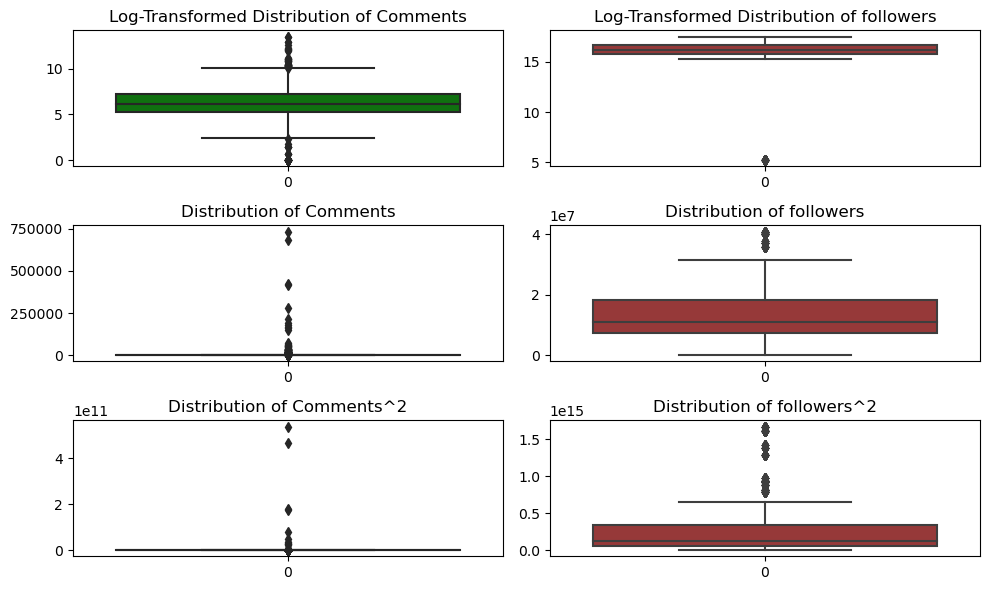

In [26]:
# We can find out that there is zeros in descriptive_stats
# Adjusting for zero values and applying log transformation

# Applying log transformation
data['log_likes'] = np.log(data['likes'] + 1)
data['log_comments'] = np.log(data['no_of_comments'] + 1)
data['log_followers'] = np.log(data['follower_count_at_t'] + 1)

data['comments_2'] = data['no_of_comments'] * data['no_of_comments']
data['followers_2'] = data['follower_count_at_t'] * data['follower_count_at_t']

# Creating histograms for log-transformed likes and comments
fig, axes = plt.subplots(3, 2, figsize=(10,6))

sns.boxplot(data['log_comments'], ax=axes[0,0], color='green')
axes[0,0].set_title('Log-Transformed Distribution of Comments')

sns.boxplot(data['log_followers'], ax=axes[0,1], color='brown')
# sns.histplot(data['log_followers'], bins=50, ax=axes[2], color='brown')
axes[0,1].set_title('Log-Transformed Distribution of followers')

sns.boxplot(data['no_of_comments'], ax=axes[1,0], color='green')
axes[1,0].set_title('Distribution of Comments')

sns.boxplot(data['follower_count_at_t'], ax=axes[1,1], color='brown')
axes[1,1].set_title('Distribution of followers')

sns.boxplot(data['comments_2'], ax=axes[2,0], color='green')
axes[2,0].set_title('Distribution of Comments^2')

sns.boxplot(data['followers_2'], ax=axes[2,1], color='brown')
axes[2,1].set_title('Distribution of followers^2')

plt.tight_layout()
plt.show()

/var/folders/z7/_01s0psx4qx2lm70p781_xvr0000gn/T/ipykernel_25270/4025969308.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


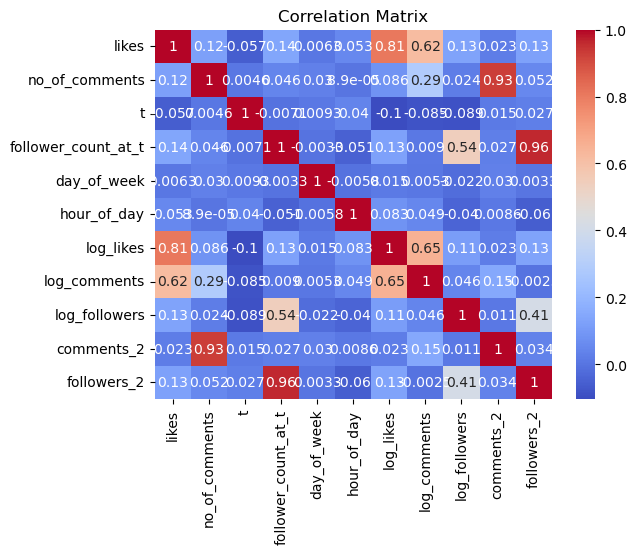

,likes,no_of_comments,t,follower_count_at_t,day_of_week,hour_of_day,log_likes,log_comments,log_followers,comments_2,followers_2
likes,1.000000,0.120402,-0.057023,0.138976,0.006340,0.053457,0.809378,0.620316,0.129495,0.023214,0.127995
no_of_comments,0.120402,1.000000,0.004595,0.045993,0.030181,0.000089,0.085747,0.288252,0.024426,0.927852,0.052283
t,-0.057023,0.004595,1.000000,-0.007114,0.009311,0.040425,-0.103991,-0.084900,-0.088578,0.014638,0.026521
follower_count_at_t,0.138976,0.045993,-0.007114,1.000000,-0.003312,-0.050923,0.125736,0.009035,0.538883,0.027445,0.964301
day_of_week,0.006340,0.030181,0.009311,-0.003312,1.000000,-0.005804,0.014548,0.005309,-0.021703,0.029702,0.003308
hour_of_day,0.053457,0.000089,0.040425,-0.050923,-0.005804,1.000000,0.083420,0.049200,-0.040012,0.008569,-0.060026
log_likes,0.809378,0.085747,-0.103991,0.125736,0.014548,0.083420,1.000000,0.654569,0.114133,0.023465,0.130731
log_comments,0.620316,0.288252,-0.084900,0.009035,0.005309,0.049200,0.654569,1.000000,0.046235,0.150072,-0.002489
log_followers,0.129495,0.024426,-0.088578,0.538883,-0.021703,-0.040012,0.114133,0.046235,1.000000,0.010795,0.412448
comments_2,0.023214,0.927852,0.014638,0.027445,0.029702,0.008569,0.023465,0.150072,0.010795,1.000000,0.034307


In [27]:
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
corr_matrix

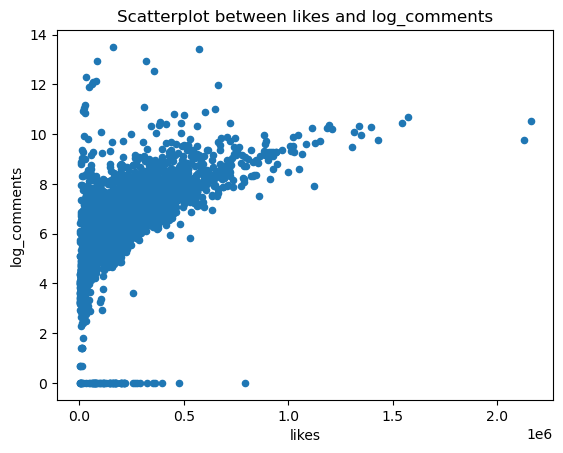

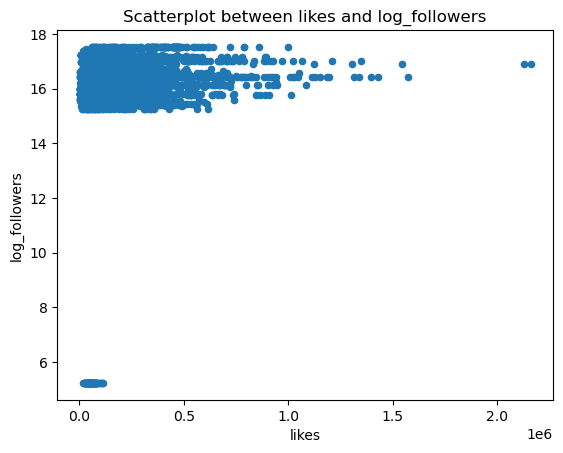

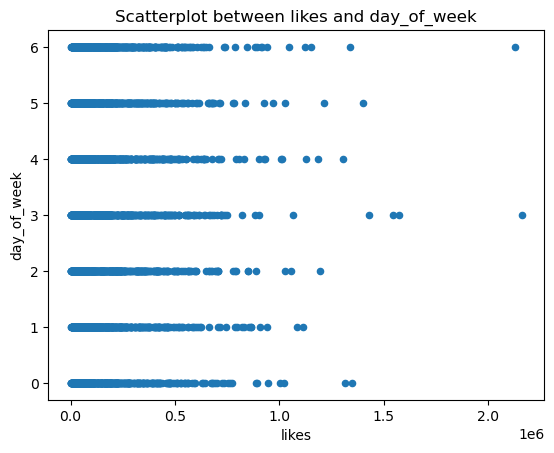

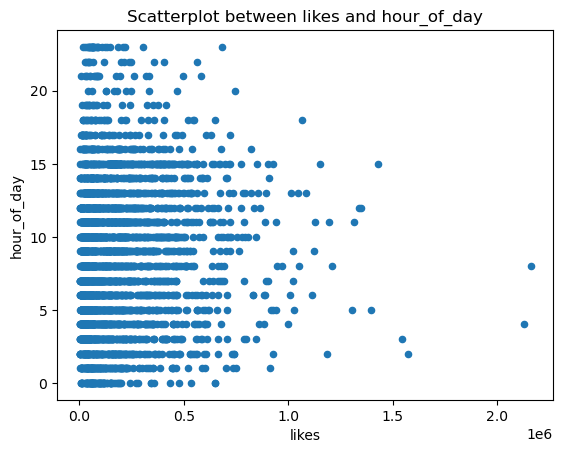

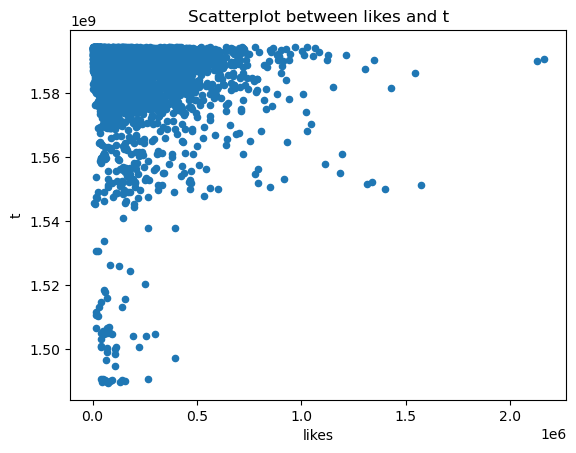

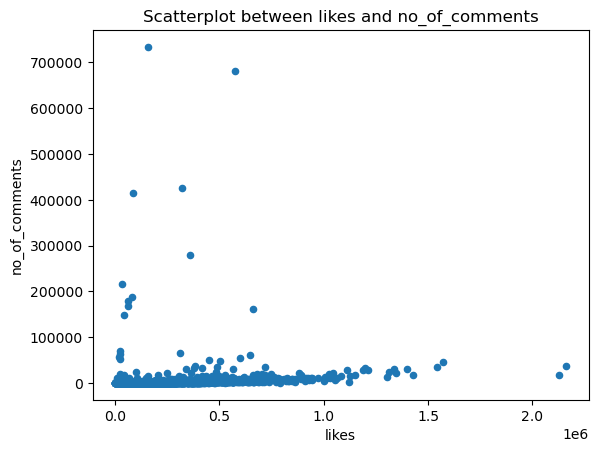

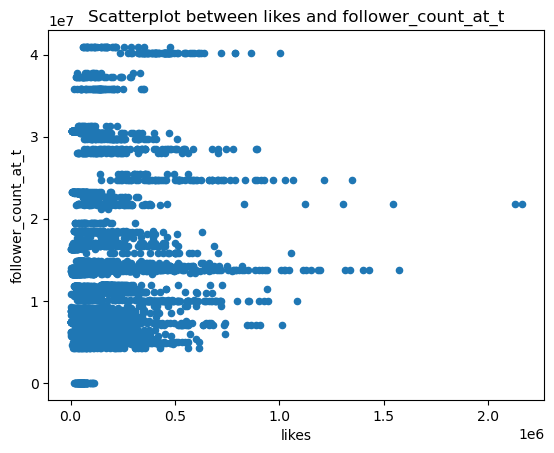

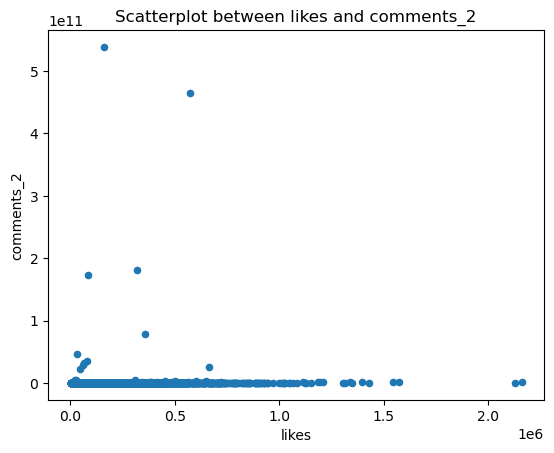

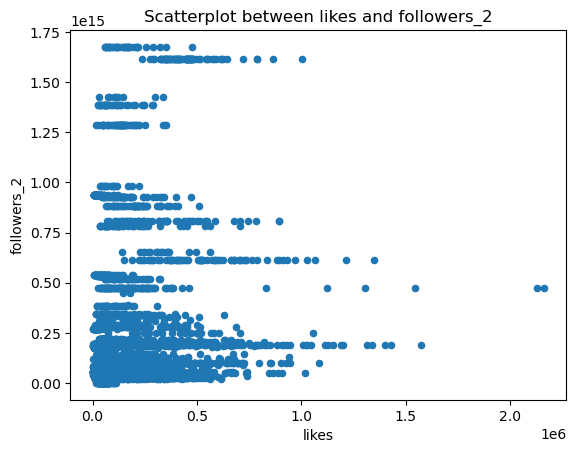

In [28]:
# sns.pairplot(data_clean)
var = ['log_comments', 'log_followers', 'day_of_week', 'hour_of_day', 't','no_of_comments','follower_count_at_t',	'comments_2','followers_2']
for i in var:
    data.plot.scatter(x = 'likes', y =i, title= f"Scatterplot between likes and {i}")

**Observation**
> It looks like only log_comments has relationship with # of likes.    
> Also, there is no relationship between variables.

## Handling the outliers

In [29]:
print('original data size', data.shape[0])
print('the data can be dropped',data.shape[0] * 0.05)


Q1_comments = data['log_comments'].quantile(0.25)
Q3_comments = data['log_comments'].quantile(0.75)
IQR_comments = Q3_comments - Q1_comments

Q1_followers = data['log_followers'].quantile(0.25)
Q3_followers = data['log_followers'].quantile(0.75)
IQR_followers = Q3_followers - Q1_followers

# Identifying outliers
outliers_comments = data[(data['log_comments'] < (Q1_comments - 1.5 * IQR_comments)) | ( data['log_comments'] > (Q3_comments + 1.5 * IQR_comments))]
outliers_followers = data[( data['log_followers'] < (Q1_followers - 1.5 * IQR_followers)) | ( data['log_followers'] > (Q3_followers + 1.5 * IQR_followers))]
print('expected # of dropped data', outliers_comments.shape[0] + outliers_followers.shape[0])

if((outliers_comments.shape[0] + outliers_followers.shape[0]) < data.shape[0] * 0.05):
    data_clean = data.drop(outliers_comments.index)
    data_clean
    print('Data remove outlier')
else:
    print("Not enough data to perform outlier removal")

original data size 3785
the data can be dropped 189.25
expected # of dropped data 180
Data remove outlier


In [30]:
data_selected = data_clean[['log_comments', 'follower_count_at_t','no_of_comments', 'log_followers', 't']]
# data_selected = data_clean[['log_comments', 'log_followers']]
data_selected

,log_comments,follower_count_at_t,no_of_comments,log_followers,t
38,6.371612,37729625,584,17.445956,1592887285
39,7.366445,37729625,1581,17.445956,1592791347
40,6.236370,37729625,510,17.445956,1592790642
41,5.899897,37729625,364,17.445956,1591445819
42,6.883463,37729625,975,17.445956,1587646084
...,...,...,...,...,...
3780,8.704502,4229627,6029,15.257625,1555164674
3781,7.860185,4229627,2591,15.257625,1554706282
3782,5.537334,4229627,253,15.257625,1553945996
3783,7.069874,4229627,1175,15.257625,1552645088


In [31]:
X = data_selected
y = data_clean['likes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Define a set of alphas to search
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

# Grid search with cross-validation
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# using the best alpha to do ML
print('using best aplha to run ML')
lasso = Lasso(alpha=best_alpha)

# Fit the model
lasso = lasso.fit(X_train, y_train)
# Predicting
y_pred = lasso.predict(X_test)

# Evaluating the model
mse_lasso = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_lasso }")
print('train of R^2',lasso.score(X_train, y_train))
print('test R^2',lasso.score(X_test, y_test))

Best alpha: 100
using best aplha to run ML
Mean Squared Error: 14264294499.139132
train of R^2 0.5924375239596312
test R^2 0.5865467400543881


In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)
mse_linear = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse_linear)

print('train of R^2',model.score(X_train, y_train))
print('test R^2',model.score(X_test, y_test))

Mean Squared Error: 14265029451.452148
train of R^2 0.592438016434699
test R^2 0.5865254373233109


In [34]:
pg.linear_regression(X_train, y_train)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-2.452432e+06,4.148947e-07,-5.910973e+12,0.000000e+00,0.592438,0.591744,-2.452432e+06,-2.452432e+06
1,log_comments,7.055002e+04,3.523996e-04,2.001989e+08,0.000000e+00,0.592438,0.591744,7.055002e+04,7.055002e+04
2,follower_count_at_t,4.773333e-04,2.415560e-04,1.976077e+00,4.823957e-02,0.592438,0.591744,3.696856e-06,9.509697e-04
3,no_of_comments,2.252957e+01,8.862820e-01,2.542032e+01,5.230450e-129,0.592438,0.591744,2.079177e+01,2.426737e+01
4,log_followers,6.739088e+03,1.976877e-05,3.408957e+08,0.000000e+00,0.592438,0.591744,6.739088e+03,6.739088e+03
5,t,1.290534e-03,2.530218e-06,5.100487e+02,0.000000e+00,0.592438,0.591744,1.285573e-03,1.295495e-03


In [35]:
data_selected = data_clean[['log_comments', 'follower_count_at_t','no_of_comments', 'log_followers']]
X = data_selected
y = data_clean['likes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
data_selected

X = data_selected
y = data_clean['likes']

# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
nbrs = KNR(n_neighbors=10).fit(X_train, y_train)
print("Train score: ", nbrs.score(X_train,y_train)) 

predictions = nbrs.predict(X_test)
mse_KNR = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse_KNR)

Train score:  0.8360346774599844
Mean Squared Error: 8038352010.819498


In [37]:
k = 1
Error = pd.DataFrame(columns=['k','TrainError','TestError','Train_r^2','Test_r^2'])

while k<101 :
    nbrs = KNR(n_neighbors=k).fit(X_train, y_train)
    
    pred_trainy = nbrs.predict(X_train)
    err_train = mean_squared_error(y_train,pred_trainy)

    pred_testy = nbrs.predict(X_test)
    err_test = mean_squared_error(y_test,pred_testy)

    train_r2 = nbrs.score(X_train, y_train)
    test_r2 = nbrs.score(X_test, y_test)

    Error.loc[k] = [k, err_train,err_test,train_r2, test_r2]

    k = k+1

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(Error)

         k  TrainError  TestError  Train_r^2  Test_r^2
1      1.0   3.069e+07  1.059e+10      0.999     0.693
2      2.0   2.140e+09  6.907e+09      0.936     0.800
3      3.0   3.003e+09  6.289e+09      0.911     0.818
4      4.0   3.537e+09  6.350e+09      0.895     0.816
5      5.0   4.038e+09  6.511e+09      0.880     0.811
6      6.0   4.405e+09  6.797e+09      0.869     0.803
7      7.0   4.764e+09  7.049e+09      0.858     0.796
8      8.0   5.017e+09  7.478e+09      0.851     0.783
9      9.0   5.229e+09  7.727e+09      0.844     0.776
10    10.0   5.507e+09  8.038e+09      0.836     0.767
11    11.0   5.788e+09  8.317e+09      0.828     0.759
12    12.0   5.998e+09  8.646e+09      0.821     0.749
13    13.0   6.236e+09  8.960e+09      0.814     0.740
14    14.0   6.556e+09  9.292e+09      0.805     0.731
15    15.0   6.827e+09  9.590e+09      0.797     0.722
16    16.0   7.071e+09  9.975e+09      0.789     0.711
17    17.0   7.270e+09  1.024e+10      0.784     0.703
18    18.0

<Axes: xlabel='k'>

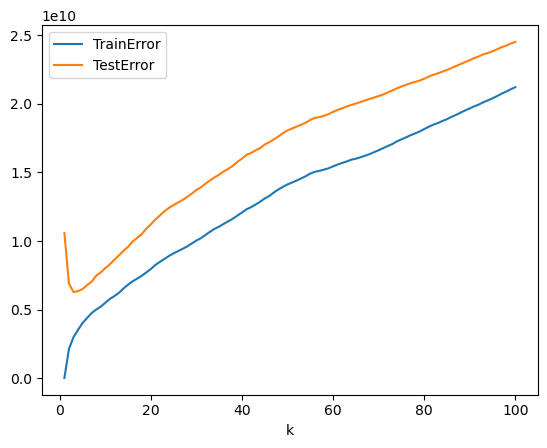

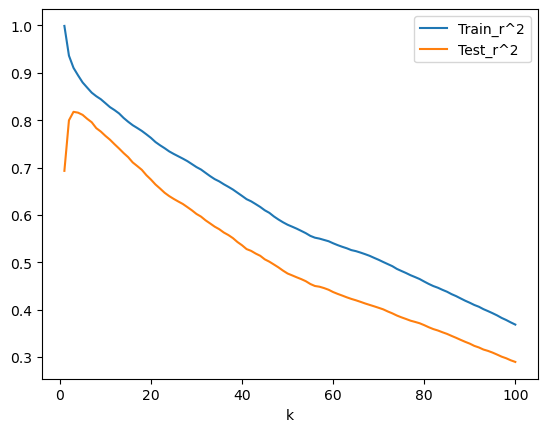

In [38]:
Error.plot( x = 'k', y = ['TrainError','TestError'])
Error.plot( x = 'k', y = ['Train_r^2','Test_r^2'])

In [39]:
lowestk = 0

for i in range(100):
    if (Error.iloc[i,2] < Error.iloc[lowestk,2]):
        lowestk = i


lowestk_error = Error.iloc[lowestk ,2]
print("when k =",Error.iloc[lowestk,0], ", the lowerst MSE is", lowestk_error)
print(Error.iloc[lowestk])

when k = 3.0 , the lowerst MSE is 6289247605.729317
k             3.000000e+00
TrainError    3.003110e+09
TestError     6.289248e+09
Train_r^2     9.105892e-01
Test_r^2      8.177050e-01
Name: 3, dtype: float64


[1.42642945e+10 1.42650295e+10 6.28924761e+09]


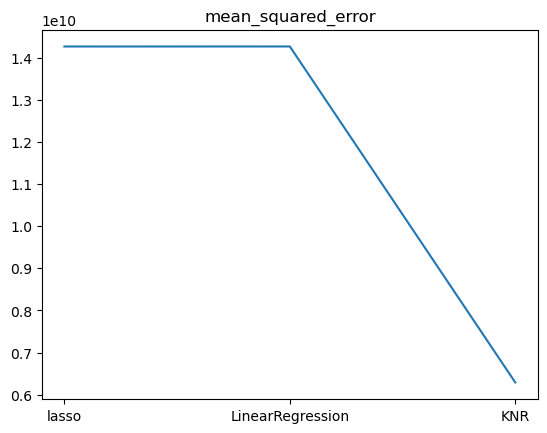

In [40]:
xpoints = np.array(['lasso','LinearRegression','KNR'])
ypoints = np.array([mse_lasso,mse_linear,lowestk_error])
print(ypoints)
plt.plot(xpoints, ypoints)
plt.title('mean_squared_error')
plt.show()